# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Rahmat Dwi Putra]
- **Email:** [rahmatgt21@gmail.com]
- **ID Dicoding:** [rahmat_dwi_putra_21]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola penggunaan sepeda pada hari kerja dan akhir pekan?
- Pertanyaan 2 : Bagaimana pengaruh cuaca terhadap penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install streamlit
!pip install pyngrok

In [ ]:
# mengimport library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [ ]:
# membaca dataset
day_data = pd.read_csv("/content/drive/MyDrive/Bangkit Academy 2024 By Google, GoTo, Tokopedia, Traveloka - Machine Learning Path /day.csv")
hour_data = pd.read_csv("/content/drive/MyDrive/Bangkit Academy 2024 By Google, GoTo, Tokopedia, Traveloka - Machine Learning Path /hour.csv")
#menampilkan baris pertama dari dataset
print(day_data.head())
print(hour_data.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

In [ ]:
# cek apa ada data yang missing values di dataset
print(day_data.isnull().sum())
print(hour_data.isnull().sum())

# ini cek tipe data
print(day_data.dtypes)
print(hour_data.dtypes)

#kalo perlu ubah tipe data
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
instant         int64
dteday         object
season          int64
yr            

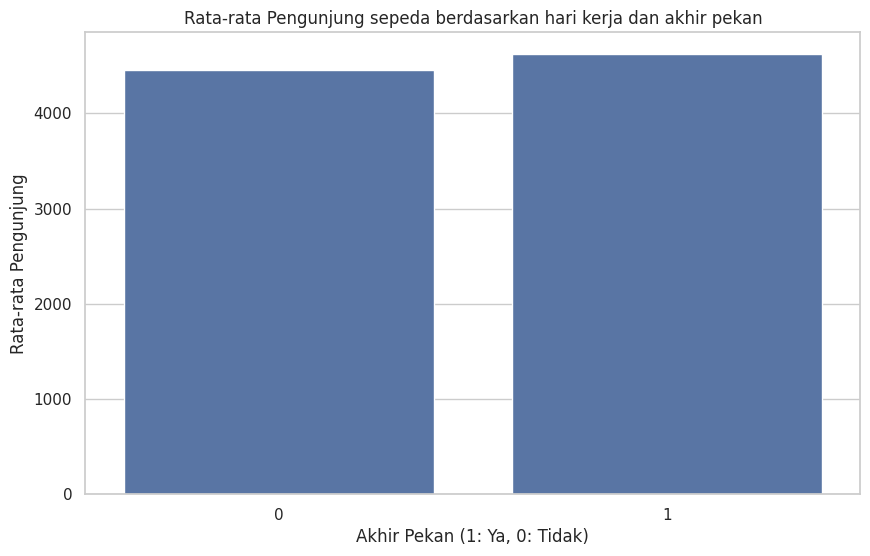

In [ ]:
# membuat kolom baru untuk mengelompokan hari kerja dan akhir pekan
day_data['is_weekend'] = day_data['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# visual pola pengguna sepeda berdasarkan akhir pekan dan hari kerja
plt.figure(figsize=(10, 6))
sns.barplot( data=day_data, x='is_weekend', y='cnt', estimator=np.mean, errorbar=None)
plt.title('Rata-rata Pengunjung sepeda berdasarkan hari kerja dan akhir pekan')
plt.xlabel('Akhir Pekan (1: Ya, 0: Tidak)')
plt.ylabel('Rata-rata Pengunjung')
plt.show()

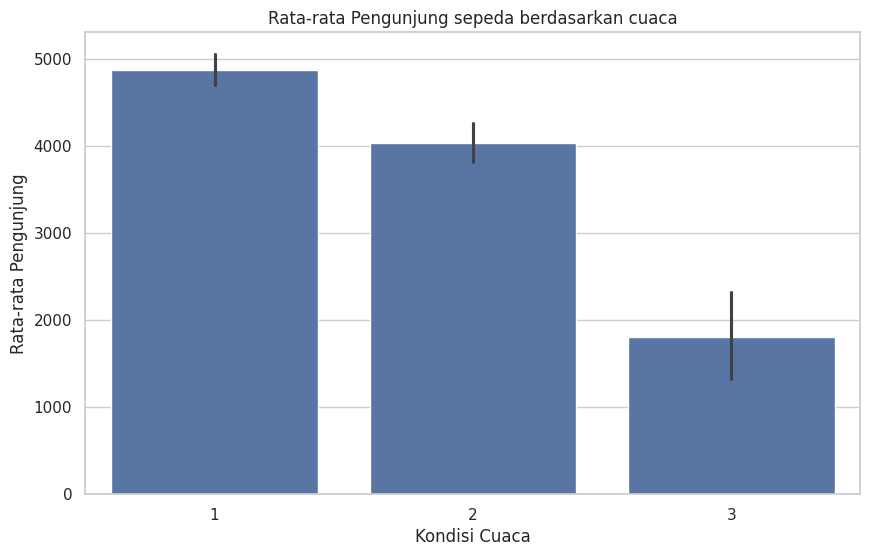

In [ ]:
# visual cuaca terhadap pengguna sepeda
plt.figure(figsize=(10, 6))
sns.barplot(data=day_data, x='weathersit', y='cnt')
plt.title('Rata-rata Pengunjung sepeda berdasarkan cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Pengunjung')
plt.show()

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Judul Dashboard
st.title('Dashboard Pengguna Sepeda')

# Membuat dataset
day_data = pd.read_csv('/content/drive/MyDrive/Bangkit Academy 2024 By Google, GoTo, Tokopedia, Traveloka - Machine Learning Path /day.csv')
hour_data = pd.read_csv('/content/drive/MyDrive/Bangkit Academy 2024 By Google, GoTo, Tokopedia, Traveloka - Machine Learning Path /hour.csv')

# menampilkan data
st.write('Tabel Data Pengguna Sepeda')
st.write(day_data.head())

# visual 1: Penggunaan sepeda di akhir pekan dan hari kerja
st.write('Visualisasi Penggunaan Sepeda di Akhir Pekan dan Hari Kerja')
day_data['is_weekend'] = day_data['weekday'].apply(lambda x: 1 if x >= 5 else 0)
fig, ax = plt.subplots()
sns.barplot(data=day_data, x='is_weekend', y='cnt', estimator=np.mean, ax=ax)
st.pyplot(fig)

# visual 2 : Pengaruh cuaca terhadap penggunaan sepeda
st.write('Visualisasi Pengaruh Cuaca terhadap Penggunaan Sepeda')
fig, ax = plt.subplots()
sns.barplot(data=day_data, x='weathersit', y='cnt', ax=ax)
st.pyplot(fig)

Overwriting app.py


In [ ]:
from pyngrok import ngrok

# jalankan streamlit
!streamlit run app.py & npx localtunnel --port 8501

# url ngrok
#public_url = ngrok.connect(port='8501')
#print(f"Dashboard Streamlit tersedia di: {public_url}")




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.82.172.211:8501

your url is: https://purple-stars-tease.loca.lt
  Stopping...
^C
